<a href="https://colab.research.google.com/github/alyscs/ignis/blob/master/Introdu%C3%A7%C3%A3o_a_Classifica%C3%A7%C3%A3o_AlphaA02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Treinaremos com 1617 elementos e tetaremos com 540 elementos
The Accuracy was 53.52%
A acurácia do Alysson foi 52.59%
1 100 101 27738


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


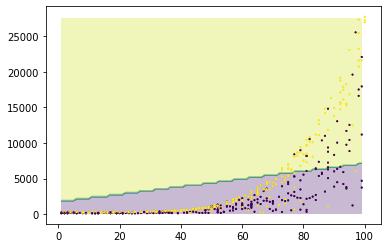

In [0]:
import pandas as pd
import seaborn as sns

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price':'preco',
    'unfinished':'nao_finalizado'
}

dados = dados.rename(columns = a_renomear)

troca = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)


x = dados[['horas_esperadas','preco']]
y = dados['finalizado']

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,random_state = SEED, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e tetaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100 
print("The Accuracy was %.2f%%" % acuracia)


import numpy as np
previsoes_do_alysson = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_do_alysson) * 100
print("A acurácia do Alysson foi %.2f%%" % acuracia)



x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

pixels = 100
np.arange(x_min, x_max, (x_max - x_min)/pixels)

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)